# 데이터 시각화 
 - 데이터 과학자가 갖춰야할 기본 기술 중 하나 
 - 시각화는 쉽지만 좋은 시각화는 어렵다. 

## 목적 
 - 데이터 탐색(Exploration)
 - 데이터 전달(Communication)

## matplotlib
 - 인터랙티브한 시각화를 만들고 싶다면 가장 좋은 선택은 아니다.
 - 기본적인 간단한 막대 그래프, 선그래프, 산점도를 그릴때는 나쁘지 않다.

### 방법
 - marplotlib.pyplot을 사용.
 - 단계별로 시각화를 간편하게 만들 수 있는 구조 
 - 완성되면 savefig()를 통해 저장. show()를 통해 화면에 띄울 수 있다. 

In [15]:
import matplotlib.pyplot as plt

## Line 그래프 

In [11]:
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

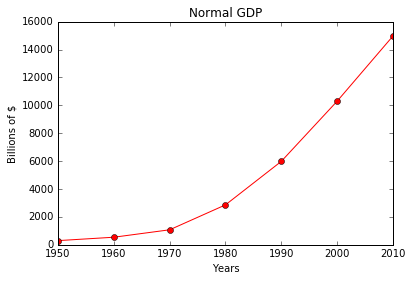

In [12]:
%matplotlib inline
plt.plot(years,gdp, color='red',marker='o',linestyle='solid')
plt.title("Normal GDP") # add title 
plt.ylabel("Billions of $") # add y label
plt.xlabel("Years")
plt.show()

## 막대 그래프 

In [16]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

In [24]:
# 막대 너비의 기본값이 0.8 이다. 
# 막대가 가운데로 올 수 있도록 왼쪽 좌표에 0.1씩 더해 주자 
xs = [i + 0.1 for i,_ in enumerate(movies)]
xs

[0.1, 1.1, 2.1, 3.1, 4.1]

 - 왼쪽편으로부터 x축의 위치가 xs이고 높이가 num_oscars 인 막대를 그리자.
 - 막대의 가운데에 영화 제목이 오도록 

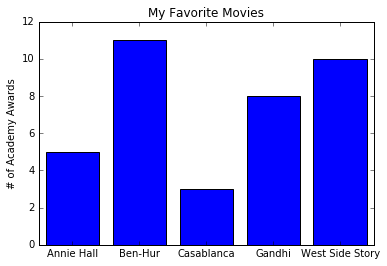

In [28]:
plt.bar(xs, num_oscars)
plt.ylabel("# of Academy Awards")
plt.title("My Favorite Movies")
plt.xticks([i+0.5 for i,_ in enumerate(movies)], movies)
plt.show()

In [2]:
import collections as col
grades = [83,95,91,87,70,0,85,82,100,67,73,77,0]
decile = lambda grade: grade // 10 * 10
histogram = col.Counter(decile(grade) for grade in grades) # get dictionary 
histogram

Counter({0: 2, 60: 1, 70: 3, 80: 4, 90: 2, 100: 1})

- plt.bar 의 세 번째 인자는 막대의 너비 
 - 기본은 각 구간의 너비가 10인데 너비를 8로 만듬으로써 막대 간에 공간이 생긴다. 
- 막대를 왼쪽으로 4씩 이동해서 80에 해당하는 막대가 왼쪽은 76 오른쪽은 84가 되고 중점은 80이 되도록 하게 했다. 
- x축의 범위를 -5 ~ 105,  y축 범위를 0 ~ 5 
- xticks 을 통해 x축의 레이블이 0~100까지 10씩 늘어나도록 설정. 

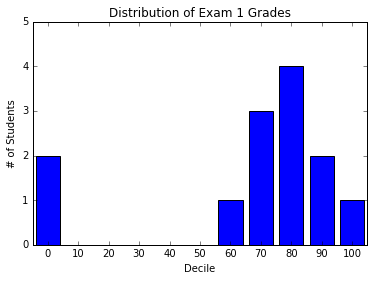

In [7]:
plt.bar([x - 4 for x in histogram.keys()], # shift each bar to the left by 4
            histogram.values(),                # give each bar its correct height
            8)                                 # give each bar a width of 8
plt.axis([-5, 105, 0, 5])                  # x-axis from -5 to 105,
                                               # y-axis from 0 to 5
plt.xticks([10 * i for i in range(11)])    # x-axis labels at 0, 10, ..., 100
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.show()

## 막대 그래프를 그릴 때 y축이 0에서 시작하지 않으면 아래와 같은 오해를 불러일으킨다. 

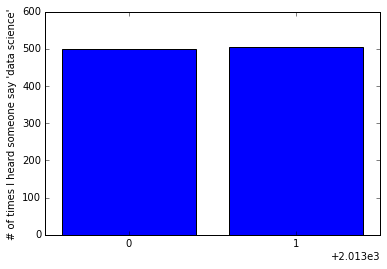

In [15]:
mentions = [500, 505]
years = [2013, 2014]

plt.bar([2012.6, 2013.6], mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")

# if you don't do this, matplotlib will label the x-axis 0, 1 
# and then add a +2.013e3 off in the corner (bad matplotlib!)

### plt.ticklabel_format(useOffset=False) 가 없다면 0,1로 표현되고 이상한 곳에 2.013e3이 나타난다.

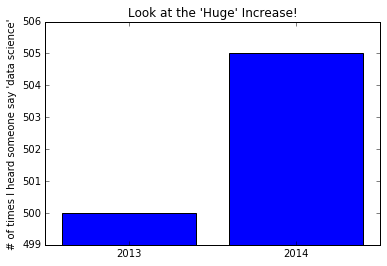

In [12]:
mentions = [500, 505]
years = [2013, 2014]

plt.bar([2012.6, 2013.6], mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")

# if you don't do this, matplotlib will label the x-axis 0, 1 
# and then add a +2.013e3 off in the corner (bad matplotlib!)

plt.ticklabel_format(useOffset=False)

# misleading y-axis only shows the part above 500
plt.axis([2012.5,2014.5,499,506])
plt.title("Look at the 'Huge' Increase!")
plt.show()

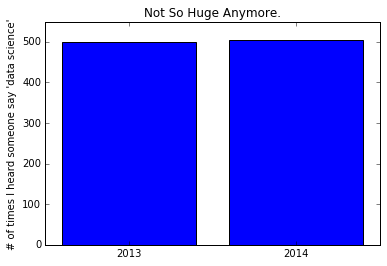

In [16]:
mentions = [500, 505]
years = [2013, 2014]

plt.bar([2012.6, 2013.6], mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")

# if you don't do this, matplotlib will label the x-axis 0, 1 
# and then add a +2.013e3 off in the corner (bad matplotlib!)

plt.ticklabel_format(useOffset=False)
plt.axis([2012.5,2014.5,0,550])
plt.title("Not So Huge Anymore.")
plt.show()

# 선그래프 
 - plt.plot()을 활용하면 그릴 수 있다. 
 - 어떠한 경향을 보여 줄 때 사용한다. 

In [22]:
variance     = [1,2,4,8,16,32,64,128,256]
bias_squared = [256,128,64,32,16,8,4,2,1]
total_error  = [x + y for x, y in zip(variance, bias_squared)]
# xs = [i for i,_ in enumerate(variance)]
xs = range(len(variance))
total_error

[257, 130, 68, 40, 32, 40, 68, 130, 257]

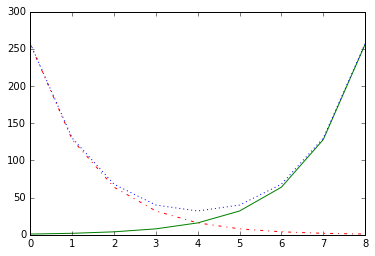

In [26]:
# we can make multiple calls to plt.plot
# to show multiple series on the same chart
plt.plot(xs, variance,     'g-',  label='variance')    # green solid line
plt.plot(xs, bias_squared, 'r-.', label='bias^2')      # red dot-dashed line
plt.plot(xs, total_error,  'b:',  label='total error') # blue dotted line

 - 각 Series 에 label을 미리 달아 놨기 떄문에 범례 ( legend ) 를 어렵지 않게 그릴 수 있다. 
 - 여기서 loc = 9 는 "top center(위쪽 중앙)" 을 의미 

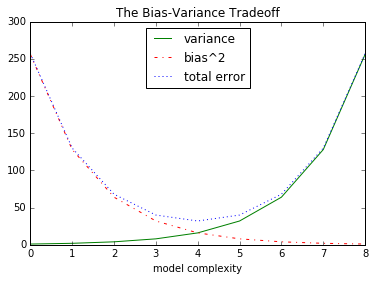

In [28]:
plt.plot(xs, variance,     'g-',  label='variance')    # green solid line
plt.plot(xs, bias_squared, 'r-.', label='bias^2')      # red dot-dashed line
plt.plot(xs, total_error,  'b:',  label='total error') # blue dotted line
plt.legend(loc=9)
plt.xlabel("model complexity")
plt.title("The Bias-Variance Tradeoff")
plt.show()

#  산점도
 - 두 변수 간의 연관 관계를 보여 주고 싶을 때 적합한 형태의 그래프 
 - 아래와 같이 사용자의 친구 수와 그들이 매일 사이트에서 체류하는 시간 사이의 연관성을 보여준다. 

In [30]:
friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

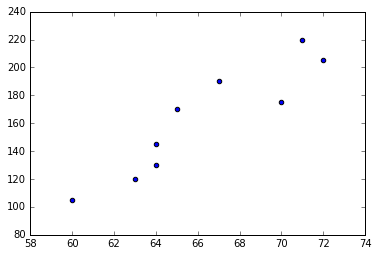

In [32]:
plt.scatter(friends,minutes)  # 독립변수, 종속변수

 - 각 포인트에 레이블 달기.

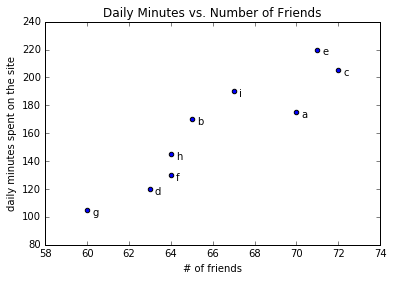

In [34]:
plt.scatter(friends,minutes)  # 독립변수, 종속변수

for label, friend_count, minute_count in zip(labels, friends, minutes):
        plt.annotate(label,
                     xy=(friend_count, minute_count), # labelㅇ들 데이터 포인트 근처에 두되
                     xytext=(5, -5), # 약간 떨어져있게
                     textcoords='offset points')

plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()

## 변수들끼리 비교할 때
 - matplotlib이 자동으로 축의 범위를 설정하게 하면 아래와 같이 공정한 비교를 하지 못하게 될 수 있다. 

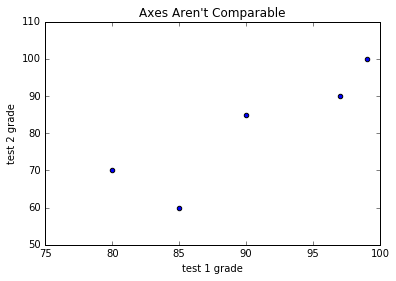

In [18]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

plt.scatter(test_1_grades, test_2_grades)
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.title("Axes Aren't Comparable")

plt.show()

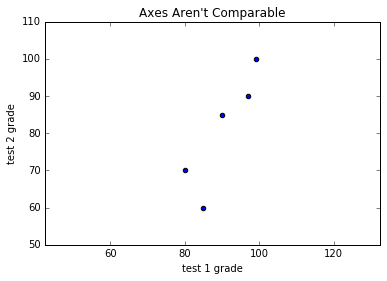

In [19]:
plt.scatter(test_1_grades, test_2_grades)
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.title("Axes Aren't Comparable")
plt.axis("equal")

plt.show()

## 파이차트

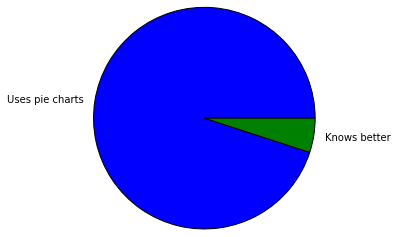

In [16]:
plt.pie([0.95, 0.05], labels=["Uses pie charts", "Knows better"])

# make sure pie is a circle and not an oval
plt.axis("equal")
plt.show()

# ggplot 2 for python

In [2]:
from ggplot import *

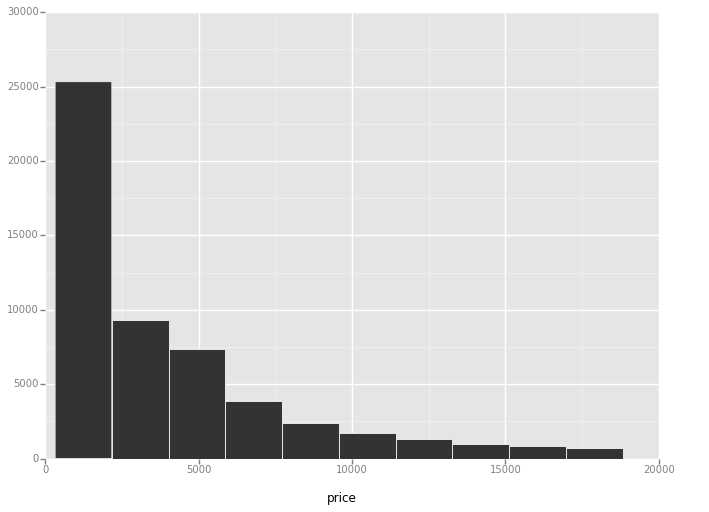

<ggplot: (117243634794)>

In [6]:
%matplotlib inline
p = ggplot(aes(x='price'), data=diamonds)
p + geom_histogram()

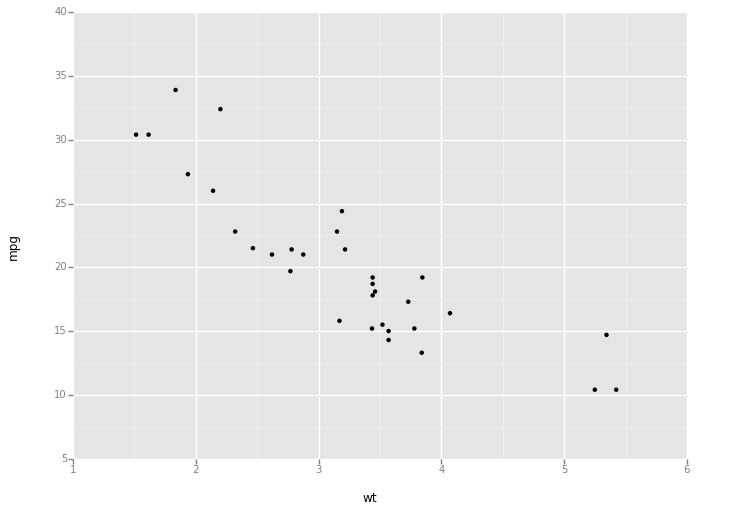

<ggplot: (-9223371919610974492)>

In [7]:
ggplot(mtcars, aes(x='wt', y='mpg')) + geom_point()